In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
% matplotlib inline

In [3]:
births_df = pd.read_pickle('births_df0.pickle')

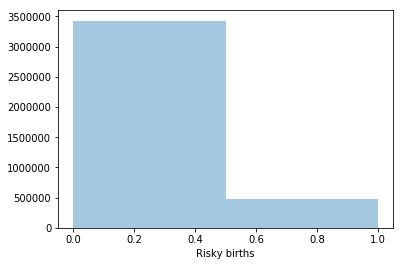

In [10]:
sns.distplot(births_df.risky0, bins = 2,kde=False, axlabel = 'Risky births');

In [3]:
age_risky = (births_df[births_df.risky0 == 1].
             groupby(['mager9', 'risky0'], as_index = False).
             dob_mm.count())
age_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['mager9', 'risky0'], as_index = False)
                .dob_mm.count())

ages = births_df.mager9.unique()
ages.sort()
ages_df = pd.DataFrame(ages)
ages_df['risky'] = age_risky['dob_mm']
ages_df['not_risky'] = age_notrisky['dob_mm']
ages = pd.Series(['Under 15','15-19', '20-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54'])
ages_df['ages'] = ages

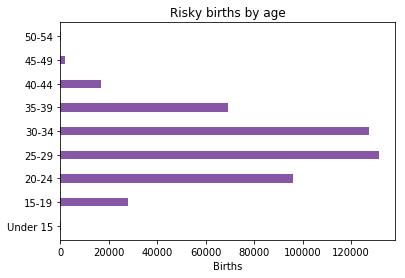

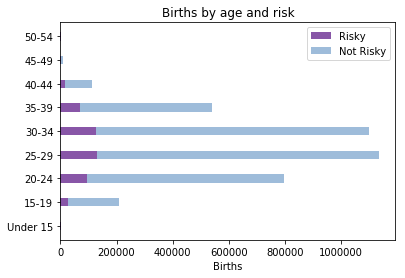

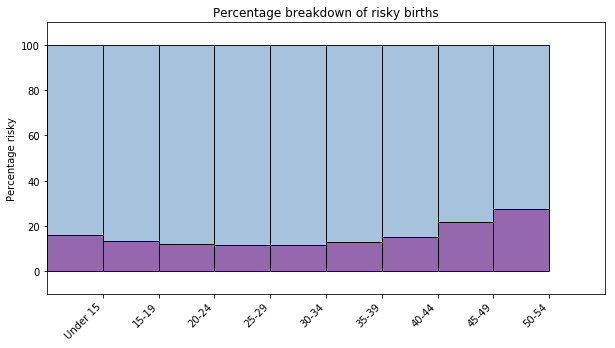

In [4]:
#RISKY BIRTHS ONLY
ind = np.arange(9)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, ages_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by age')
plt.yticks(ind, ('Under 15','15-19', '20-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(9)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, ages_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, ages_df.not_risky, width,
             left=ages_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Births by age and risk')
plt.yticks(ind, ('Under 15','15-19', '20-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(ages_df.ages))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(ages_df.risky, ages_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(ages_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(ages_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, ages_df.ages)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [5]:
births_under15 = births_df[births_df.mager9 == 1]

under15_wic_risky = (births_under15[births_under15.risky0 == 1].
             groupby(['wic', 'risky0'], as_index = False).
             dob_mm.count())
under15_wic_notrisky = (births_under15[births_under15.risky0 == 0]
                .groupby(['wic', 'risky0'], as_index = False)
                .dob_mm.count())

under15_wic_risky.sort_values(by='dob_mm', ascending = True, inplace = True)
under15_wic_risky = under15_wic_risky[under15_wic_risky.wic != 'U']
under15_wic_risky.reset_index(drop = True, inplace = True)
under15_wic_notrisky.sort_values(by='dob_mm', ascending = True, inplace = True)
under15_wic_notrisky = under15_wic_notrisky[under15_wic_notrisky.wic != 'U']
under15_wic_notrisky.reset_index(drop=True, inplace = True)

wic_df = pd.DataFrame(['No WIC', 'WIC'])
wic_df['risky'] = under15_wic_risky['dob_mm']
wic_df['not_risky'] = under15_wic_notrisky['dob_mm']
wic_df['wic'] = ['No WIC', 'WIC']

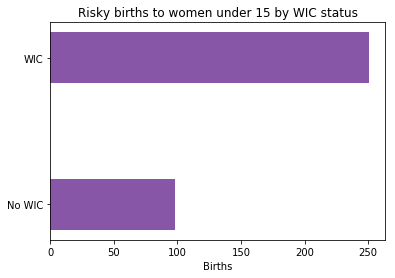

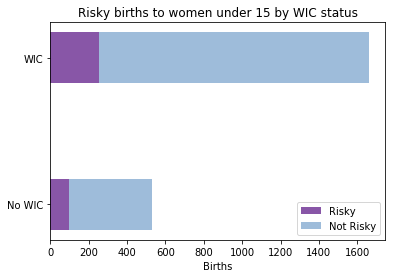

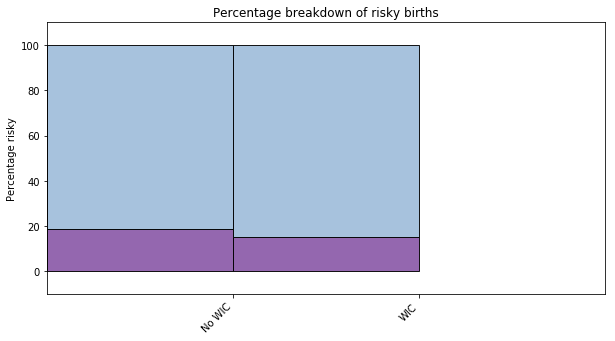

In [6]:
#RISKY BIRTHS ONLY
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, wic_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births to women under 15 by WIC status')
plt.yticks(ind, ('No WIC', 'WIC'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, wic_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, wic_df.not_risky, width,
             left=wic_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Risky births to women under 15 by WIC status')
plt.yticks(ind, ('No WIC', 'WIC'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(wic_df.wic))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(wic_df.risky, wic_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(wic_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(wic_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, wic_df.wic)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [7]:
births_df.tbo_rec.unique()

array([5, 1, 2, 3, 8, 7, 4, 6, 9])

In [8]:
tbo_risky = (births_df[births_df.risky0 == 1].
             groupby(['tbo_rec', 'risky0'], as_index = False).
             dob_mm.count())
tbo_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['tbo_rec', 'risky0'], as_index = False)
                .dob_mm.count())

tbo_risky = tbo_risky[tbo_risky.tbo_rec != 9]
tbo_notrisky = tbo_notrisky[tbo_notrisky.tbo_rec != 9]

tbo = [1, 2, 3, 4, 5, 6, 7, 8]
tbo_df = pd.DataFrame(tbo)
tbo_df['risky'] = tbo_risky['dob_mm']
tbo_df['not_risky'] = tbo_notrisky['dob_mm']

tbo_df['tbo'] = tbo

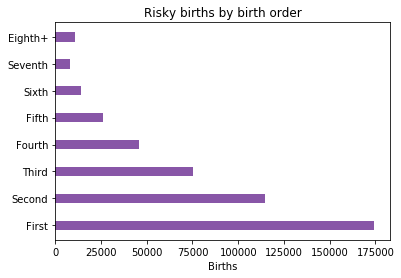

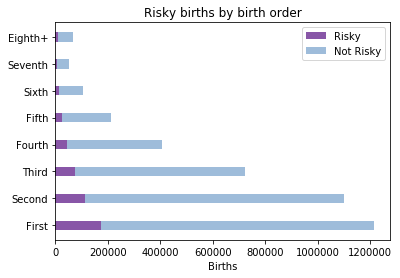

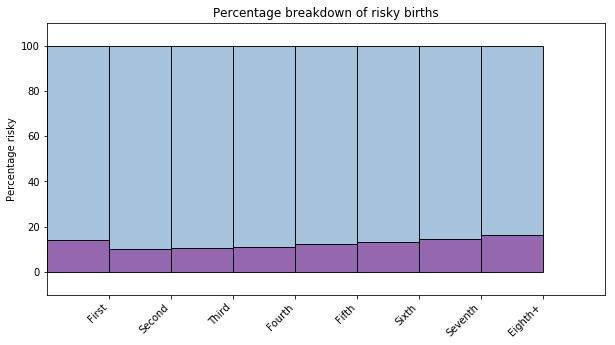

In [9]:
#RISKY BIRTHS ONLY
ind = np.arange(8)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, tbo_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by birth order')
plt.yticks(ind, ('First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth+'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(8)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, tbo_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, tbo_df.not_risky, width,
             left=tbo_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Risky births by birth order')
plt.yticks(ind, ('First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth+'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(tbo_df.tbo))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(tbo_df.risky, tbo_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(tbo_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(tbo_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, ('First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth+'))
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [10]:
eighth_birth = births_df[births_df.tbo_rec == 8]

eighth_wic_risky = (eighth_birth[eighth_birth.risky0 == 1].
             groupby(['wic', 'risky0'], as_index = False).
             dob_mm.count())
eighth_wic_notrisky = (eighth_birth[eighth_birth.risky0 == 0]
                .groupby(['wic', 'risky0'], as_index = False)
                .dob_mm.count())

eighth_wic_risky.sort_values(by='dob_mm', ascending = True, inplace = True)
eighth_wic_risky = eighth_wic_risky[eighth_wic_risky.wic != 'U']
eighth_wic_risky.reset_index(drop = True, inplace = True)
eighth_wic_notrisky.sort_values(by='dob_mm', ascending = True, inplace = True)
eighth_wic_notrisky = eighth_wic_notrisky[eighth_wic_notrisky.wic != 'U']
eighth_wic_notrisky.reset_index(drop=True, inplace = True)

wic8_df = pd.DataFrame(['No WIC', 'WIC'])
wic8_df['risky'] = eighth_wic_risky['dob_mm']
wic8_df['not_risky'] = eighth_wic_notrisky['dob_mm']
wic8_df['wic'] = ['No WIC', 'WIC']

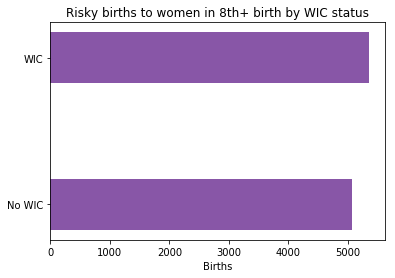

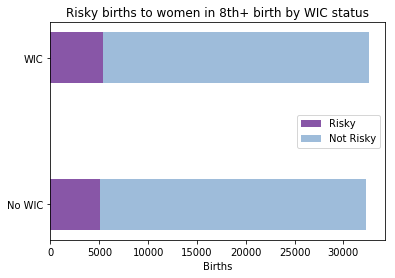

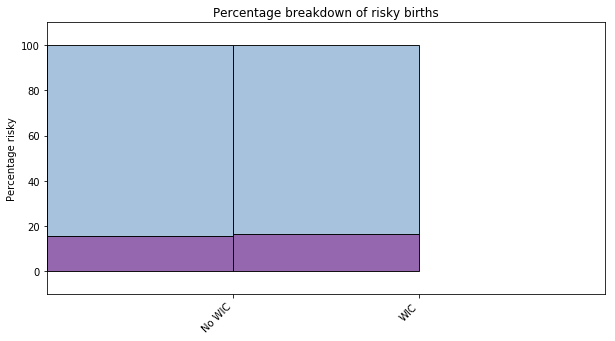

In [11]:
#RISKY BIRTHS ONLY
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, wic8_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births to women in 8th+ birth by WIC status')
plt.yticks(ind, ('No WIC', 'WIC'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, wic8_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, wic8_df.not_risky, width,
             left=wic8_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Risky births to women in 8th+ birth by WIC status')
plt.yticks(ind, ('No WIC', 'WIC'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(wic8_df.wic))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(wic8_df.risky, wic8_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(wic8_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(wic8_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, wic8_df.wic)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [42]:
eighth_birth = births_df[births_df.tbo_rec == 8]

eighth_pd_risky = (eighth_birth[eighth_birth.risky0 == 1].
             groupby(['priordead', 'risky0'], as_index = False).
             dob_mm.count())
eighth_pd_notrisky = (eighth_birth[eighth_birth.risky0 == 0]
                .groupby(['priordead', 'risky0'], as_index = False)
                .dob_mm.count())


eighth_pd_risky = eighth_pd_risky[eighth_pd_risky.priordead <= 12]


eighth_pd_notrisky = eighth_pd_notrisky[eighth_pd_notrisky.priordead <= 12]


pd8_df = pd.DataFrame(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12'])
pd8_df['risky'] = eighth_pd_risky['dob_mm']
pd8_df['not_risky'] = eighth_pd_notrisky['dob_mm']
pd8_df['pd'] = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12']

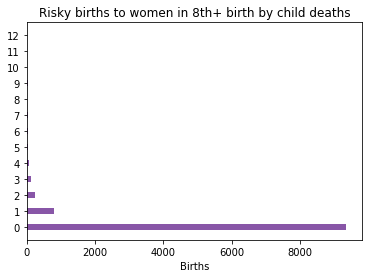

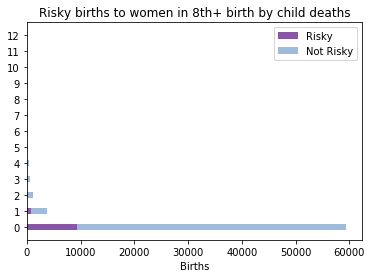

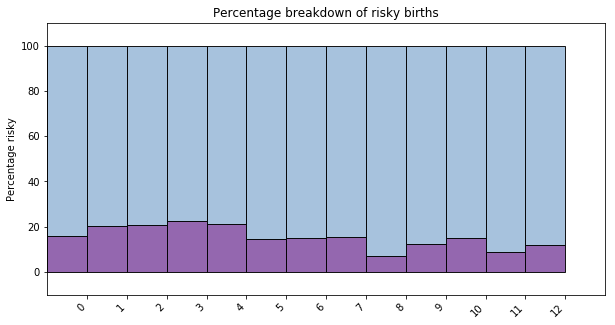

In [43]:
#RISKY BIRTHS ONLY
ind = np.arange(13)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, pd8_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births to women in 8th+ birth by child deaths')
plt.yticks(ind,('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(13)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, pd8_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, pd8_df.not_risky, width,
             left=pd8_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Risky births to women in 8th+ birth by child deaths')
plt.yticks(ind, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(pd8_df.pd))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(pd8_df.risky, pd8_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(pd8_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(pd8_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, pd8_df.pd)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [14]:
pd8_df

,0,risky,not_risky,pd
0,0,2,21,0
1,1,4,29,1
2,2,6,63,2
3,3,11,80,3
4,4,19,103,4
5,5,23,135,5
6,6,23,135,6
7,7,24,166,7
8,8,72,266,8
9,9,124,423,9


In [28]:
first_birth = births_df[births_df.tbo_rec == 1]

first_age_risky = (first_birth[first_birth.risky0 == 1].
             groupby(['mager9', 'risky0'], as_index = False).
             dob_mm.count())
first_age_notrisky = (first_birth[first_birth.risky0 == 0]
                .groupby(['mager9', 'risky0'], as_index = False)
                .dob_mm.count())

first_ages = first_birth.mager9.unique()
first_ages.sort()
first_ages_df = pd.DataFrame(first_ages)
first_ages_df['risky'] = first_age_risky['dob_mm']
first_ages_df['not_risky'] = first_age_notrisky['dob_mm']
first_ages = pd.Series(['Under 15','15-19', '20-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54'])
first_ages_df['ages'] = first_ages
first_ages_df.replace(np.nan, 0, inplace = True)

# first_age_risky.sort_values(by='dob_mm', ascending = True, inplace = True)

# eighth_pd_risky.reset_index(drop = True, inplace = True)
# eighth_pd_notrisky.sort_values(by='dob_mm', ascending = True, inplace = True)
# eighth_pd_notrisky = eighth_pd_notrisky[eighth_pd_notrisky.priordead <= 12]
# eighth_pd_notrisky.reset_index(drop=True, inplace = True)


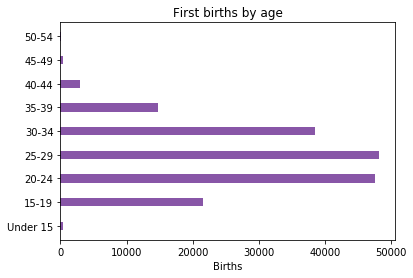

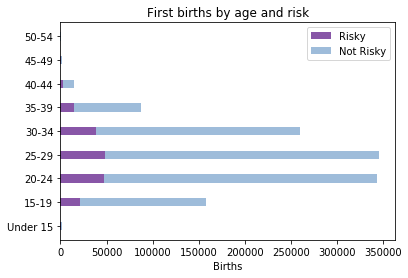

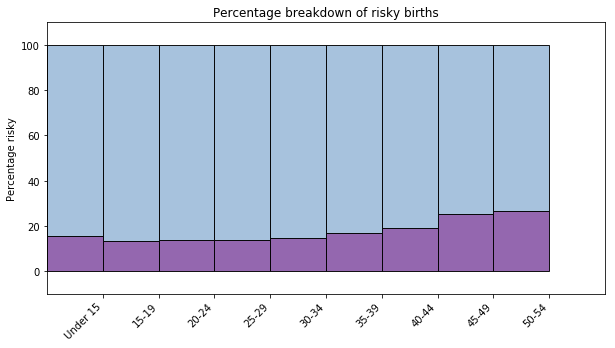

In [29]:
#RISKY BIRTHS ONLY
ind = np.arange(9)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, first_ages_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('First births by age')
plt.yticks(ind,('Under 15','15-19', '20-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(9)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, first_ages_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, first_ages_df.not_risky, width,
             left=first_ages_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('First births by age and risk')
plt.yticks(ind, ('Under 15','15-19', '20-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(first_ages_df.ages))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(first_ages_df.risky, first_ages_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(first_ages_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(first_ages_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, first_ages_df.ages)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()


In [30]:
first_ages_df

,0,risky,not_risky,ages
0,1,341,1828,Under 15
1,2,21554,136864,15-19
2,3,47549,295567,20-24
3,4,48247,297845,25-29
4,5,38547,221506,30-34
5,6,14700,72838,35-39
6,7,2896,12326,40-44
7,8,343,1003,45-49
8,9,43,119,50-54


In [36]:
inf_risky = (births_df[births_df.risky0 == 1].
             groupby(['rf_inftr', 'risky0'], as_index = False).
             dob_mm.count())
inf_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['rf_inftr', 'risky0'], as_index = False)
                .dob_mm.count())

inf_risky.sort_values(by='dob_mm', ascending = True, inplace = True)
inf_risky = inf_risky[inf_risky.rf_inftr != 'U']
inf_risky.reset_index(drop = True, inplace = True)
inf_notrisky.sort_values(by='dob_mm', ascending = True, inplace = True)
inf_notrisky = inf_notrisky[inf_notrisky.rf_inftr != 'U']
inf_notrisky.reset_index(drop=True, inplace = True)

inf_df = pd.DataFrame([ 'Infertility Treatment', 'No Infertility Treatment'])
inf_df['risky'] = inf_risky['dob_mm']
inf_df['not_risky'] = inf_notrisky['dob_mm']
inf_df['inf'] = ['Infertility Treatment', 'No Infertility Treatment']

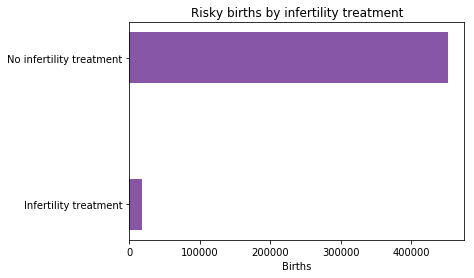

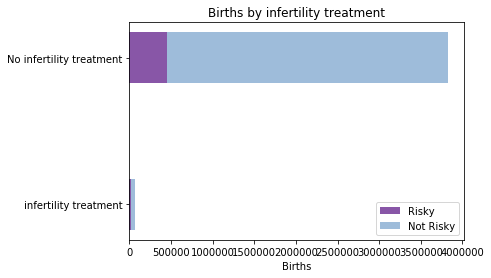

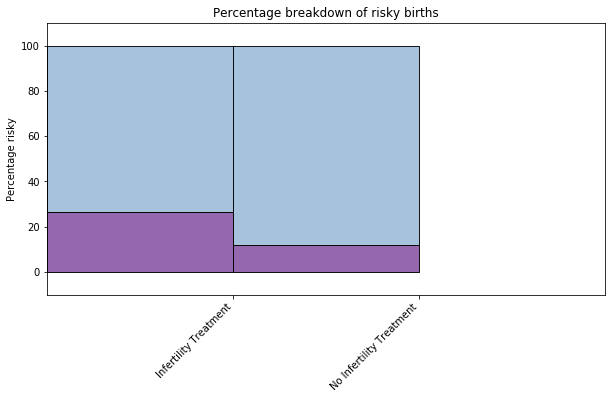

In [41]:
#RISKY BIRTHS ONLY
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, inf_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by infertility treatment')
plt.yticks(ind,('Infertility treatment', 'No infertility treatment'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, inf_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, inf_df.not_risky, width,
             left=inf_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Births by infertility treatment')
plt.yticks(ind, ('infertility treatment', 'No infertility treatment'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(inf_df.inf))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(inf_df.risky, inf_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(inf_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(inf_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, inf_df.inf)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [46]:
bmi_risky = (births_df[births_df.risky0 == 1].
             groupby(['bmi_r', 'risky0'], as_index = False).
             dob_mm.count())
bmi_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['bmi_r', 'risky0'], as_index = False)
                .dob_mm.count())

bmi_risky = bmi_risky[bmi_risky.bmi_r != 9]
bmi_notrisky = bmi_notrisky[bmi_notrisky.bmi_r != 9]

bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
bmi_df = pd.DataFrame(bmi)
bmi_df['risky'] = bmi_risky['dob_mm']
bmi_df['not_risky'] = bmi_notrisky['dob_mm']

bmi_df['bmi'] = bmi

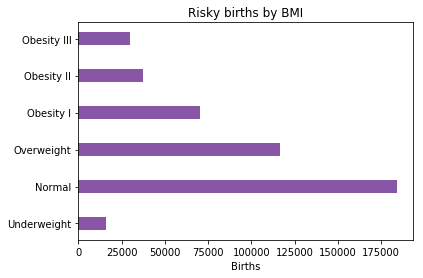

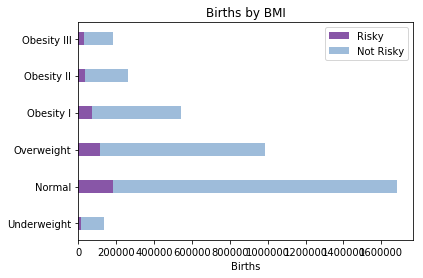

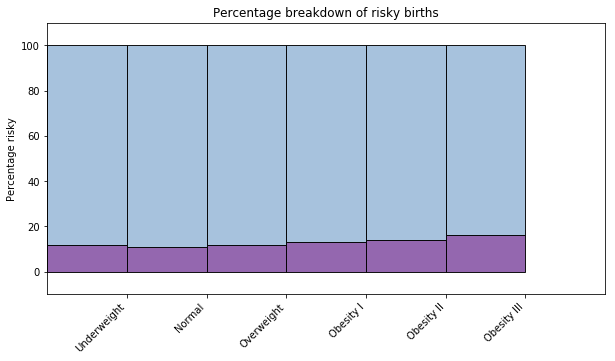

In [48]:
#RISKY BIRTHS ONLY
ind = np.arange(6)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, bmi_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by BMI')
plt.yticks(ind,('Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(6)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, bmi_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, bmi_df.not_risky, width,
             left=bmi_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Births by BMI')
plt.yticks(ind, ('Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(bmi_df.bmi))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(bmi_df.risky, bmi_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(bmi_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(bmi_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, bmi_df.bmi)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [51]:
plural_risky = (births_df[births_df.risky0 == 1].
             groupby(['dplural', 'risky0'], as_index = False).
             dob_mm.count())
plural_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['dplural', 'risky0'], as_index = False)
                .dob_mm.count())

# plural_risky = plural_risky[plural_risky.dplural != 9]
# plural_notrisky = plural_notrisky[plural_notrisky.dplural != 9]

plural = ['Single', 'Twins', 'Triplets', 'Quadruplets', 'Quintuplets+']
plural_df = pd.DataFrame(plural)
plural_df['risky'] = plural_risky['dob_mm']
plural_df['not_risky'] = plural_notrisky['dob_mm']

plural_df['plural'] = plural
plural_df.replace(np.nan, 0, inplace =True)

In [52]:
plural_df

,0,risky,not_risky,plural
0,Single,413209,3354880.0,Single
1,Twins,54797,74223.0,Twins
2,Triplets,3286,379.0,Triplets
3,Quadruplets,193,14.0,Quadruplets
4,Quintuplets+,31,0.0,Quintuplets+


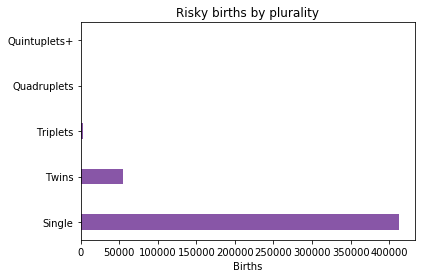

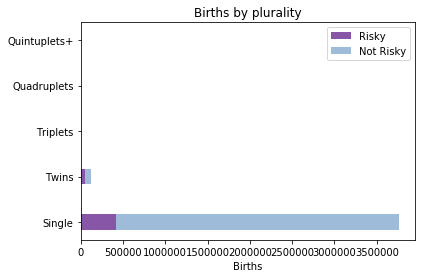

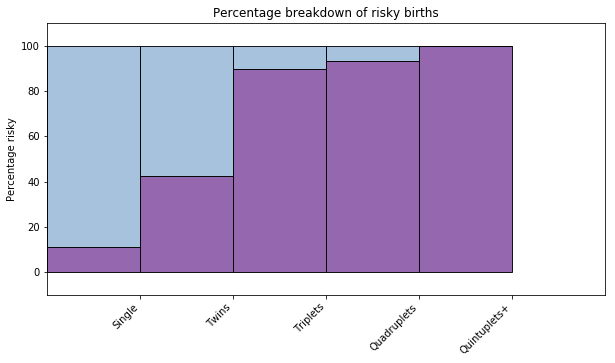

In [53]:
#RISKY BIRTHS ONLY
ind = np.arange(5)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, plural_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by plurality')
plt.yticks(ind,('Single', 'Twins', 'Triplets', 'Quadruplets', 'Quintuplets+'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(5)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, plural_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, plural_df.not_risky, width,
             left=plural_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Births by plurality')
plt.yticks(ind, ('Single', 'Twins', 'Triplets', 'Quadruplets', 'Quintuplets+'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(plural_df.plural))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(plural_df.risky, plural_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(plural_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(plural_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, plural_df.plural)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [54]:
plural_df

,0,risky,not_risky,plural
0,Single,413209,3354880.0,Single
1,Twins,54797,74223.0,Twins
2,Triplets,3286,379.0,Triplets
3,Quadruplets,193,14.0,Quadruplets
4,Quintuplets+,31,0.0,Quintuplets+


In [57]:
gdiab_risky = (births_df[births_df.risky0 == 1].
             groupby(['rf_gdiab', 'risky0'], as_index = False).
             dob_mm.count())
gdiab_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['rf_gdiab', 'risky0'], as_index = False)
                .dob_mm.count())

gdiab_risky.sort_values(by='dob_mm', ascending = True, inplace = True)
gdiab_risky = gdiab_risky[gdiab_risky.rf_gdiab != 'U']
gdiab_risky.reset_index(drop = True, inplace = True)
gdiab_notrisky.sort_values(by='dob_mm', ascending = True, inplace = True)
gdiab_notrisky = gdiab_notrisky[gdiab_notrisky.rf_gdiab != 'U']
gdiab_notrisky.reset_index(drop=True, inplace = True)

gdiab = ['Gestational diabetes', 'No Gestiational Diabetes']
gdiab_df = pd.DataFrame(gdiab)
gdiab_df['risky'] = gdiab_risky['dob_mm']
gdiab_df['not_risky'] = gdiab_notrisky['dob_mm']

gdiab_df['gdiab'] = gdiab


In [58]:
gdiab_df

,0,risky,not_risky,gdiab
0,Gestational diabetes,38591,194067,Gestational diabetes
1,No Gestiational Diabetes,432602,3233943,No Gestiational Diabetes


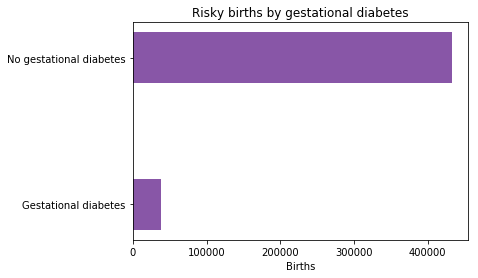

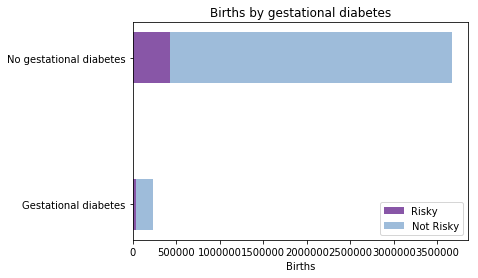

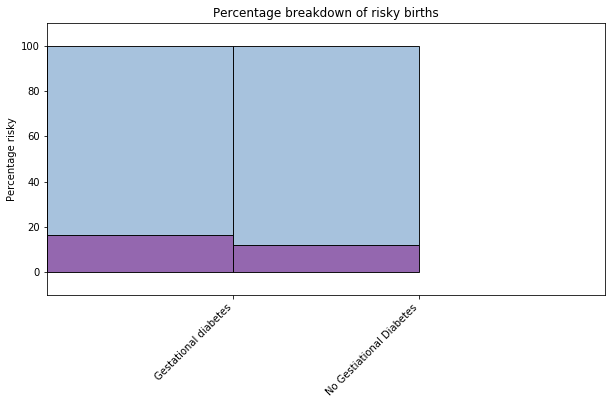

In [60]:
#RISKY BIRTHS ONLY
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, gdiab_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by gestational diabetes')
plt.yticks(ind,('Gestational diabetes', 'No gestational diabetes'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, gdiab_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, gdiab_df.not_risky, width,
             left=gdiab_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Births by gestational diabetes')
plt.yticks(ind, ('Gestational diabetes', 'No gestational diabetes'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(gdiab_df.gdiab))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(gdiab_df.risky, gdiab_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(gdiab_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(gdiab_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, gdiab_df.gdiab)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [64]:
ehype_risky = (births_df[births_df.risky0 == 1].
             groupby(['rf_ehype', 'risky0'], as_index = False).
             dob_mm.count())
ehype_notrisky = (births_df[births_df.risky0 == 0]
                .groupby(['rf_ehype', 'risky0'], as_index = False)
                .dob_mm.count())

ehype_risky.sort_values(by='dob_mm', ascending = True, inplace = True)
ehype_risky = ehype_risky[ehype_risky.rf_ehype != 'U']
ehype_risky.reset_index(drop = True, inplace = True)
ehype_notrisky.sort_values(by='dob_mm', ascending = True, inplace = True)
ehype_notrisky = ehype_notrisky[ehype_notrisky.rf_ehype != 'U']
ehype_notrisky.reset_index(drop=True, inplace = True)

ehype = ['Eclampsia hypertension', 'No eclampsia hypertension']
ehype_df = pd.DataFrame(ehype)
ehype_df['risky'] = ehype_risky['dob_mm']
ehype_df['not_risky'] = ehype_notrisky['dob_mm']

ehype_df['ehype'] = ehype


In [65]:
ehype_df

,0,risky,not_risky,ehype
0,Eclampsia hypertension,3675,6553,Eclampsia hypertension
1,No eclampsia hypertension,467518,3421457,No eclampsia hypertension


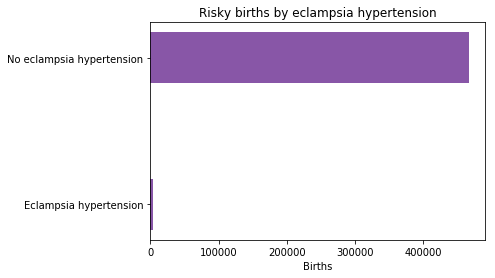

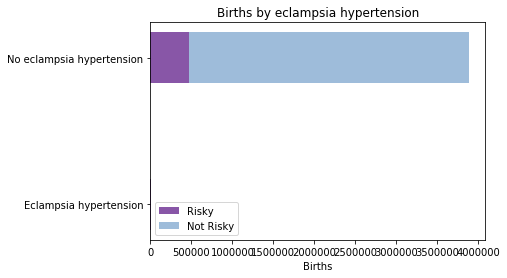

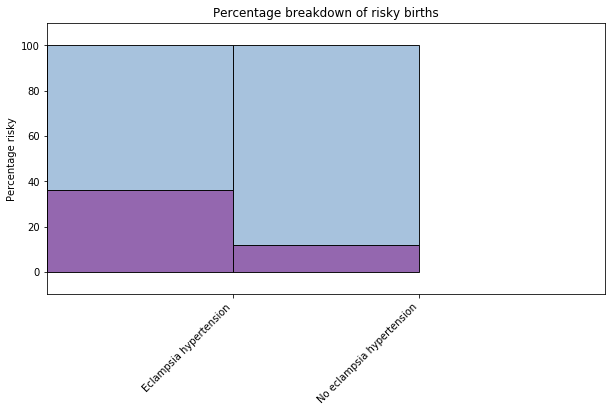

In [67]:
#RISKY BIRTHS ONLY
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, ehype_df.risky, width, color='#8856a7')


plt.xlabel('Births')
plt.title('Risky births by eclampsia hypertension')
plt.yticks(ind,('Eclampsia hypertension', 'No eclampsia hypertension'))
#plt.yticks(np.arange(0, 81, 10))


plt.show()

#RISKY AND NON RISKY STACKED BAR CHART
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, ehype_df.risky, width, color='#8856a7')
p2 = plt.barh(ind, ehype_df.not_risky, width,
             left=ehype_df.risky, color='#9ebcda')

plt.xlabel('Births')
plt.title('Births by eclampsia hypertension')
plt.yticks(ind, ('Eclampsia hypertension', 'No eclampsia hypertension'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Risky', 'Not Risky'))

plt.show()

#PERCENTAGE RISKY BAR GRAPH
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(ehype_df.ehype))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(ehype_df.risky, ehype_df.not_risky)]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(ehype_df.risky, totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(ehype_df.not_risky, totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#8856a7',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Less Risky Births', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#9ebcda', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='black'
       )



# Set the ticks to be first names
plt.title('Percentage breakdown of risky births')
plt.xticks(tick_pos, ehype_df.ehype)
ax.set_ylabel("Percentage risky")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()